In this presentation, we will use the CIFAR-10 dataset, which contains 60,000 color images (32x32) We will do a classification for the 10 categories we have

In [1]:
#Tools

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading the data set
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape
#The training sample are 50.000 , the image is 32x32 and the 3 is for RGB

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
#Let's check X_train[2]
X_train[2]
#You can that it's 32x32 with 3 columns for RGB

array([[[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[113, 120, 112],
        [111, 118, 111],
        [105, 112, 106],
        ...,
        [ 72,  81,  80],
        [ 72,  80,  79],
        [ 72,  80,  79]],

       [[111, 118, 110],
        [104, 111, 104],
        [ 99, 106,  98],
        ...,
        [ 68,  75,  73],
        [ 70,  76,  75],
        [ 78,  84,  82]],

       [[106, 113, 105],
        [ 99, 106,  98],
        [ 95, 102,  94],
        ...,
        [ 78,  85,  83],
        [ 79,  85,  83],
        [ 80,  86,  84]]

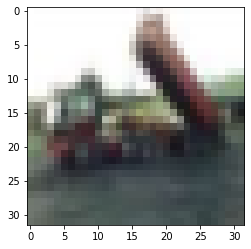

In [13]:
# Showing the picture with Matplotlib
plt.imshow(X_train[2])
#Look like a truck

In [14]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
y_train.shape

(50000,)

In [16]:
y_train = y_train.reshape(-1)
#If you don't want to change a specific dimension just put -1 on it '50.000'
#for the 2nd dimension we want to flatten the output to have all the result into an array

In [18]:
#Let's try
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [19]:
#We create classes variable for the output to integrate it into different classes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [20]:
#Create a function fo imshow

def look(X, y, index):
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])   #We want to print the label as well with the variable classes that we created

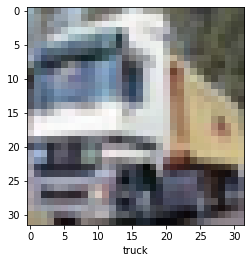

In [21]:
look(X_train, y_train, 1)
#Now we have image + classe

# Normalization

In [22]:
X_train[0]
#You can see that the value are between 0 to 255

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [23]:
X_train[0]/255
#The value are now between 0 and 1

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [24]:
X_train = X_train/255
X_test = X_test/ 255

We will try first to use ANN to see the results and then we will do CNN for comparaison

In [25]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 7s 3ms/step - loss: 1.8104 - accuracy: 0.3509
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6245 - accuracy: 0.4268
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5408 - accuracy: 0.4586
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4802 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4327 - accuracy: 0.4952


In [26]:
#Evaluating the model in test sample
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4741 - accuracy: 0.4637


[1.4740700721740723, 0.46369999647140503]

In [27]:
#Let's see the classification report

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.58      0.56      1000
           1       0.68      0.45      0.55      1000
           2       0.37      0.34      0.35      1000
           3       0.26      0.66      0.37      1000
           4       0.58      0.22      0.32      1000
           5       0.54      0.16      0.24      1000
           6       0.55      0.46      0.50      1000
           7       0.52      0.56      0.54      1000
           8       0.70      0.52      0.60      1000
           9       0.47      0.68      0.55      1000

    accuracy                           0.46     10000
   macro avg       0.52      0.46      0.46     10000
weighted avg       0.52      0.46      0.46     10000



# CNN

In [28]:
cnn = models.Sequential([
    
    #input_shape is the img
    layers.Conv2D(filters =32, kernel_size=(3,3), activation= "relu", input_shape=(32,32,3)), #Filter size is kernel_size
    layers.MaxPool2D((2,2)), #you can use avg pooling
    
    layers.Conv2D(filters =32, kernel_size=(3,3), activation= "relu"), #another con and pool
    layers.MaxPool2D((2,2)),
    
    #Dense
        layers.Flatten(),#You don't need to specify the shape in CNN (it's auto)
        layers.Dense(70, activation='relu'),
        layers.Dense(10, activation='softmax') 

In [29]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
           )

In [30]:
cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 9s 3ms/step - loss: 1.5020 - accuracy: 0.4562
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1495 - accuracy: 0.5940
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0313 - accuracy: 0.6377
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9646 - accuracy: 0.6632
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9076 - accuracy: 0.6834


In [31]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9421 - accuracy: 0.6726


[0.9421107172966003, 0.6725999712944031]

In [32]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [33]:
y_pred[5]

array([1.0267008e-03, 6.2009721e-04, 1.6721442e-02, 4.0795818e-02,
       4.2893896e-03, 4.1858863e-02, 8.9172482e-01, 1.8927451e-03,
       1.9851286e-04, 8.7160640e-04], dtype=float32)

In [34]:
#To have the max value we will use argmax

np.argmax(y_pred[5])

6

In [35]:
#If we want to predict a bunch of them , we will do a for loop, in each element we will look at the max value and print it
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [36]:
#Let's compare it with X_test
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [37]:
#Transform y_test to 1D Array to use the class we created later "look"
y_test = y_test.reshape(-1,)

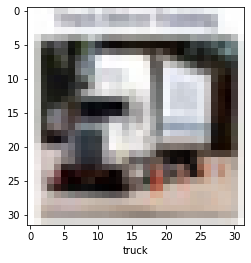

In [44]:
look(X_test, y_test, 666)

In [46]:
classes[y_classes[666]]

'truck'